In [4]:
#dataset_analysis.
import pandas as pd
import os

# Load all datasets from same-project/train folder
data_path = 'datasets/same-project/train'
datasets = [f for f in os.listdir(data_path) if f.endswith('.csv')]

print("Class Imbalance Analysis\n" + "="*60)

for dataset_name in sorted(datasets):
    file_path = os.path.join(data_path, dataset_name)
    df = pd.read_csv(file_path)
    
    # Count bugs
    total = len(df)
    buggy = (df['bug'] > 0).sum()
    non_buggy = (df['bug'] == 0).sum()
    
    # Calculate percentages
    buggy_pct = (buggy / total) * 100
    non_buggy_pct = (non_buggy / total) * 100
    
    print(f"\n{dataset_name}:")
    print(f"  Total instances: {total}")
    print(f"  Buggy (bug > 0): {buggy} ({buggy_pct:.2f}%)")
    print(f"  Non-buggy (bug = 0): {non_buggy} ({non_buggy_pct:.2f}%)")
 
print("\n" + "="*60)

Class Imbalance Analysis

ant-1.6.csv:
  Total instances: 351
  Buggy (bug > 0): 92 (26.21%)
  Non-buggy (bug = 0): 259 (73.79%)

ant-1.7.csv:
  Total instances: 745
  Buggy (bug > 0): 166 (22.28%)
  Non-buggy (bug = 0): 579 (77.72%)

camel-1.4.csv:
  Total instances: 872
  Buggy (bug > 0): 145 (16.63%)
  Non-buggy (bug = 0): 727 (83.37%)

camel-1.6.csv:
  Total instances: 965
  Buggy (bug > 0): 188 (19.48%)
  Non-buggy (bug = 0): 777 (80.52%)

ivy-1.1.csv:
  Total instances: 241
  Buggy (bug > 0): 16 (6.64%)
  Non-buggy (bug = 0): 225 (93.36%)

jedit-4.3.csv:
  Total instances: 492
  Buggy (bug > 0): 11 (2.24%)
  Non-buggy (bug = 0): 481 (97.76%)

log4j-1.2.csv:
  Total instances: 205
  Buggy (bug > 0): 189 (92.20%)
  Non-buggy (bug = 0): 16 (7.80%)

lucene-2.4.csv:
  Total instances: 340
  Buggy (bug > 0): 203 (59.71%)
  Non-buggy (bug = 0): 137 (40.29%)

poi-3.0.csv:
  Total instances: 442
  Buggy (bug > 0): 281 (63.57%)
  Non-buggy (bug = 0): 161 (36.43%)

synapse-1.2.csv:
  Total 

In [9]:
# Analyze correlation across all datasets
data_path = 'datasets/same-project/train'
datasets = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Store results
all_bug_correlations = {}
all_redundant_pairs = {}

print("CORRELATION ANALYSIS ACROSS ALL DATASETS")
print("=" * 80)

for dataset_name in sorted(datasets):
    print(f"\n{'='*80}")
    print(f"Dataset: {dataset_name}")
    print("=" * 80)
    
    # Load dataset
    file_path = os.path.join(data_path, dataset_name)
    df = pd.read_csv(file_path)
    
    # Remove non-numeric columns
    features = df.drop(columns=['name'])
    
    # Calculate correlation matrix
    corr_matrix = features.corr()
    
    # 1. Find highly correlated feature pairs (>0.85)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)-1):  # Exclude bug column from pairs
        for j in range(i+1, len(corr_matrix.columns)-1):
            if abs(corr_matrix.iloc[i, j]) > 0.85:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    high_corr_pairs.sort(key=lambda x: abs(x['Correlation']), reverse=True)
    all_redundant_pairs[dataset_name] = high_corr_pairs
    
    print(f"\nHighly Correlated Pairs (|r| > 0.85): {len(high_corr_pairs)} pairs")
    for pair in high_corr_pairs[:5]:  # Show top 5
        print(f"  {pair['Feature 1']:12s} <-> {pair['Feature 2']:12s} : {pair['Correlation']:6.3f}")
    
    # 2. Show correlation with bug column
    bug_corr = corr_matrix['bug'].drop('bug').sort_values(ascending=False)
    all_bug_correlations[dataset_name] = bug_corr
    
    print(f"\nTop 5 Features Correlated with Bugs:")
    for feature, corr_val in list(bug_corr.items())[:5]:
        print(f"  {feature:12s} : {corr_val:6.3f}")
    
    print(f"\nBottom 5 Features (Weak/Negative Correlation with Bugs):")
    for feature, corr_val in list(bug_corr.items())[-5:]:
        print(f"  {feature:12s} : {corr_val:6.3f}")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)

CORRELATION ANALYSIS ACROSS ALL DATASETS

Dataset: ant-1.6.csv

Highly Correlated Pairs (|r| > 0.85): 3 pairs
  cbo          <-> ca           :  0.965
  wmc          <-> npm          :  0.946
  wmc          <-> rfc          :  0.891

Top 5 Features Correlated with Bugs:
  rfc          :  0.672
  wmc          :  0.605
  npm          :  0.561
  loc          :  0.548
  lcom         :  0.492

Bottom 5 Features (Weak/Negative Correlation with Bugs):
  noc          :  0.004
  dit          :  0.002
  mfa          : -0.073
  lcom3        : -0.081
  cam          : -0.364

Dataset: ant-1.7.csv

Highly Correlated Pairs (|r| > 0.85): 3 pairs
  cbo          <-> ca           :  0.980
  wmc          <-> npm          :  0.936
  wmc          <-> rfc          :  0.888

Top 5 Features Correlated with Bugs:
  rfc          :  0.654
  loc          :  0.649
  wmc          :  0.562
  ce           :  0.520
  lcom         :  0.500

Bottom 5 Features (Weak/Negative Correlation with Bugs):
  dit          :  0.033

In [10]:
# Aggregate analysis: Find consistently redundant features and weak predictors
print("\n" + "=" * 80)
print("AGGREGATED FEATURE ANALYSIS ACROSS ALL DATASETS")
print("=" * 80)

# 1. Count how many datasets have each redundant pair
from collections import defaultdict
pair_counts = defaultdict(int)

for dataset_name, pairs in all_redundant_pairs.items():
    for pair in pairs:
        f1, f2 = sorted([pair['Feature 1'], pair['Feature 2']])
        pair_counts[f"{f1}|{f2}"] += 1

print("\nConsistently Redundant Feature Pairs (across multiple datasets):")
print("-" * 80)
sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
for pair_str, count in sorted_pairs[:10]:
    f1, f2 = pair_str.split('|')
    print(f"  {f1:12s} <-> {f2:12s} : Found in {count}/{len(datasets)} datasets")

# 2. Average correlation with bug across all datasets
avg_bug_corr = pd.DataFrame(all_bug_correlations).mean(axis=1).sort_values(ascending=False)

print(f"\nAverage Feature-Bug Correlation Across All {len(datasets)} Datasets:")
print("-" * 80)
print("\nTop 10 Predictive Features:")
for feature, corr_val in avg_bug_corr.head(10).items():
    print(f"  {feature:12s} : {corr_val:6.3f}")

print("\nBottom 10 Features (Weakest Predictors):")
for feature, corr_val in avg_bug_corr.tail(10).items():
    print(f"  {feature:12s} : {corr_val:6.3f}")

# 3. Recommendation
print("\n" + "=" * 80)
print("RECOMMENDED FEATURES TO REMOVE")
print("=" * 80)

# Features to remove based on redundancy and weak correlation
remove_candidates = []

# Check redundancy
print("\nBased on Redundancy (>0.85 correlation):")
for pair_str, count in sorted_pairs[:5]:
    f1, f2 = pair_str.split('|')
    f1_corr = avg_bug_corr.get(f1, 0)
    f2_corr = avg_bug_corr.get(f2, 0)
    if abs(f1_corr) < abs(f2_corr):
        remove = f1
        keep = f2
    else:
        remove = f2
        keep = f1
    remove_candidates.append(remove)
    print(f"  Remove {remove:12s} (keep {keep:12s}) - Found redundant in {count} datasets")

# Check weak predictors (bottom 5)
print("\nBased on Weak Prediction Power (avg |correlation| with bug):")
weak_features = [f for f in avg_bug_corr.tail(5).index if f not in remove_candidates]
for feature in weak_features:
    remove_candidates.append(feature)
    print(f"  Remove {feature:12s} : avg correlation = {avg_bug_corr[feature]:6.3f}")

# Always remove name
if 'name' not in remove_candidates:
    remove_candidates.insert(0, 'name')
    print(f"\n  Remove name (identifier, not predictive)")

print(f"\n{'-' * 80}")
print(f"Total Features to Remove: {len(remove_candidates)}")
print(f"Original Features: 22 (21 + target)")
print(f"After Removal: {22 - len(remove_candidates)} features")
print(f"\nFeatures to remove: {remove_candidates}")


AGGREGATED FEATURE ANALYSIS ACROSS ALL DATASETS

Consistently Redundant Feature Pairs (across multiple datasets):
--------------------------------------------------------------------------------
  ca           <-> cbo          : Found in 12/13 datasets
  rfc          <-> wmc          : Found in 12/13 datasets
  npm          <-> wmc          : Found in 10/13 datasets
  loc          <-> rfc          : Found in 6/13 datasets
  dit          <-> mfa          : Found in 6/13 datasets
  dam          <-> lcom3        : Found in 4/13 datasets
  lcom         <-> wmc          : Found in 3/13 datasets
  avg_cc       <-> max_cc       : Found in 3/13 datasets
  loc          <-> wmc          : Found in 2/13 datasets
  cbm          <-> ic           : Found in 2/13 datasets

Average Feature-Bug Correlation Across All 13 Datasets:
--------------------------------------------------------------------------------

Top 10 Predictive Features:
  rfc          :  0.487
  loc          :  0.439
  wmc          :


Generating correlation matrix for: ant-1.6.csv
Saved: output/images/correlations/ant-1.6_correlation.png
Saved: output/images/correlations/ant-1.6_correlation.png


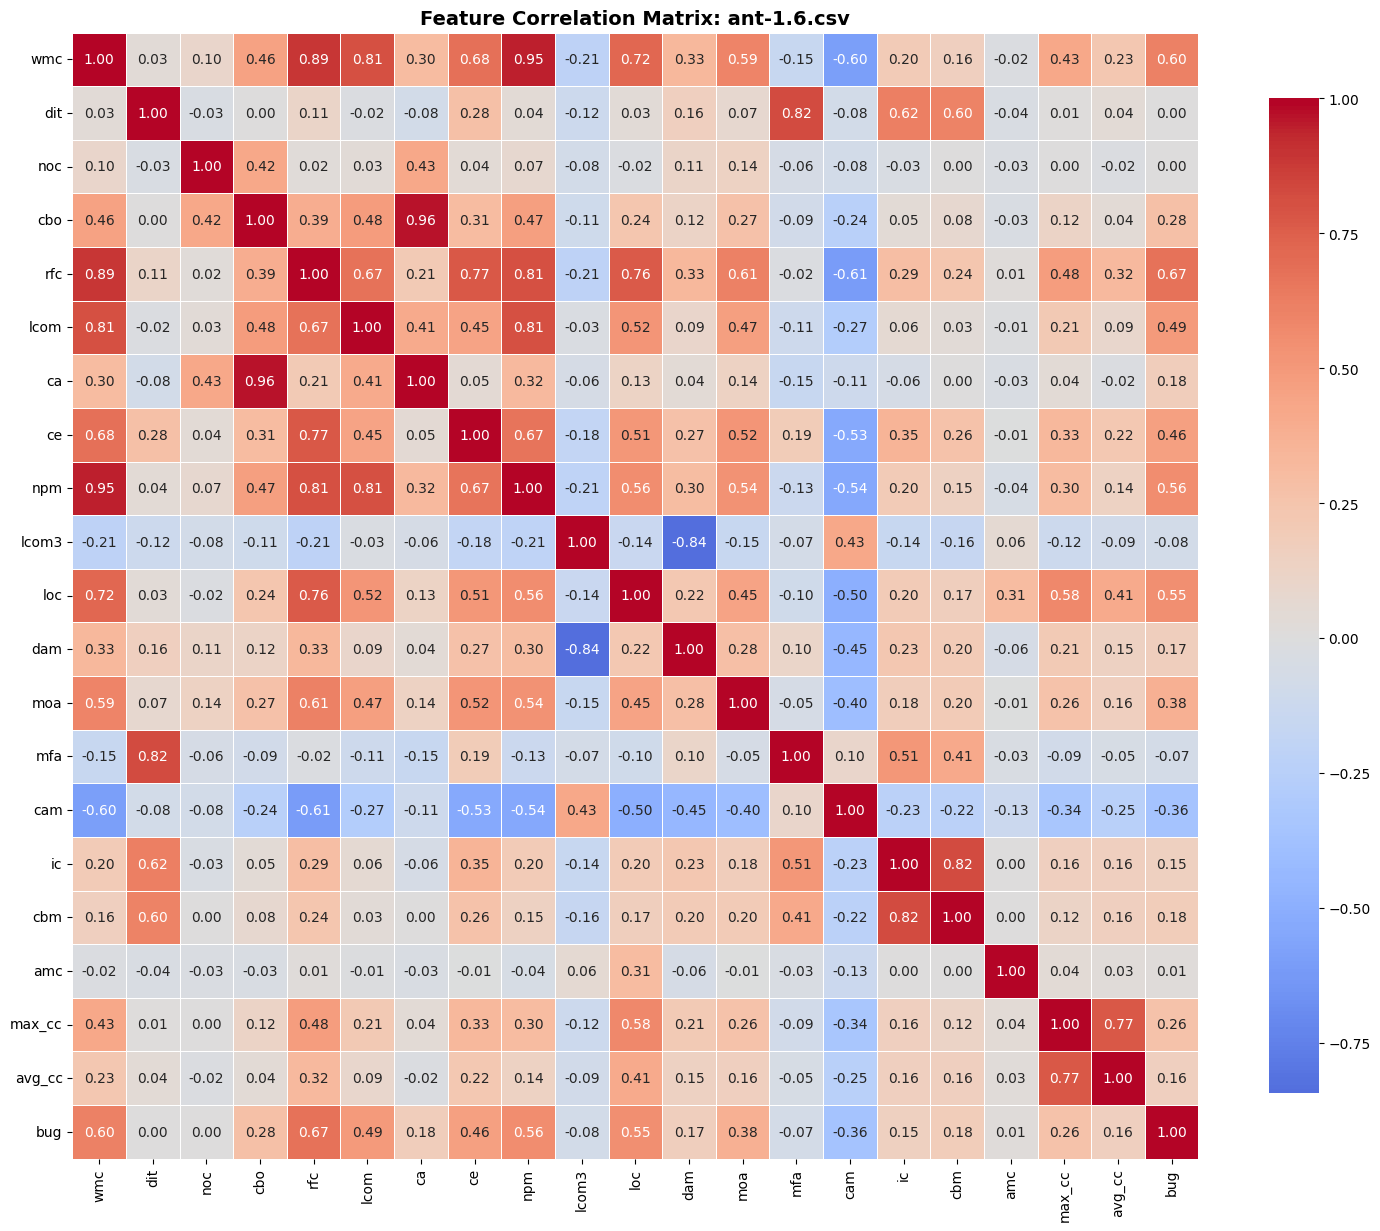

Top 3 features correlated with bugs: rfc(0.672), wmc(0.605), npm(0.561)
--------------------------------------------------------------------------------

Generating correlation matrix for: ant-1.7.csv
Saved: output/images/correlations/ant-1.7_correlation.png
Saved: output/images/correlations/ant-1.7_correlation.png


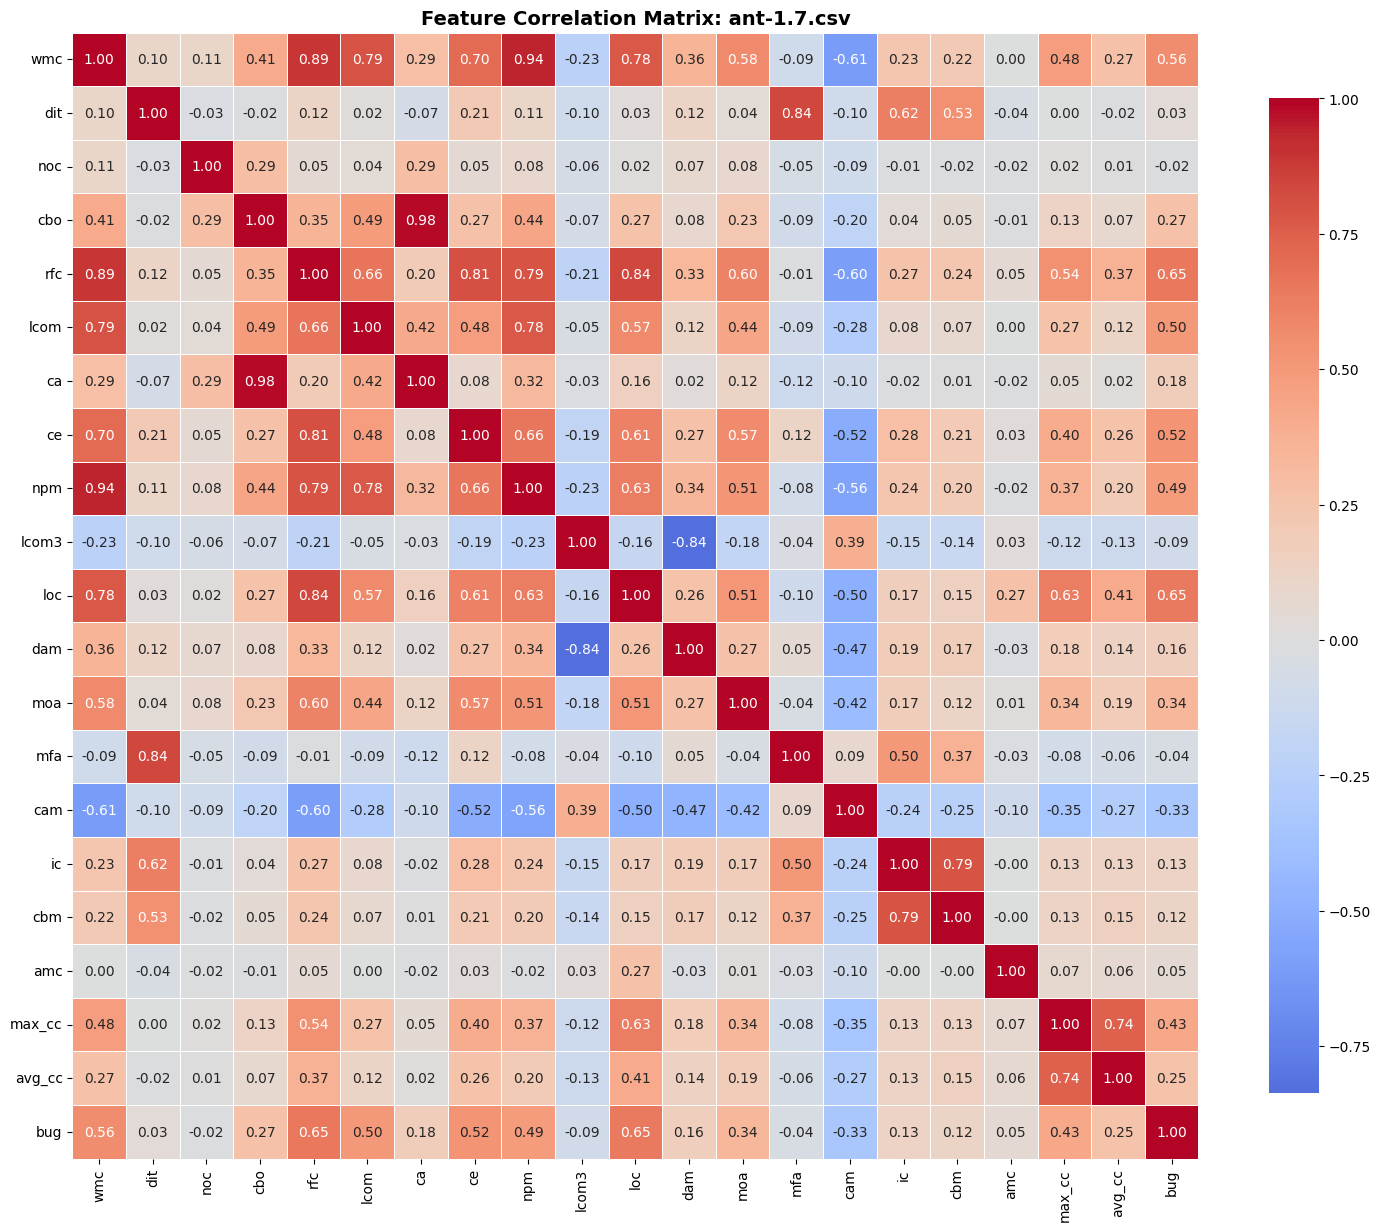

Top 3 features correlated with bugs: rfc(0.654), loc(0.649), wmc(0.562)
--------------------------------------------------------------------------------

Generating correlation matrix for: camel-1.4.csv
Saved: output/images/correlations/camel-1.4_correlation.png
Saved: output/images/correlations/camel-1.4_correlation.png


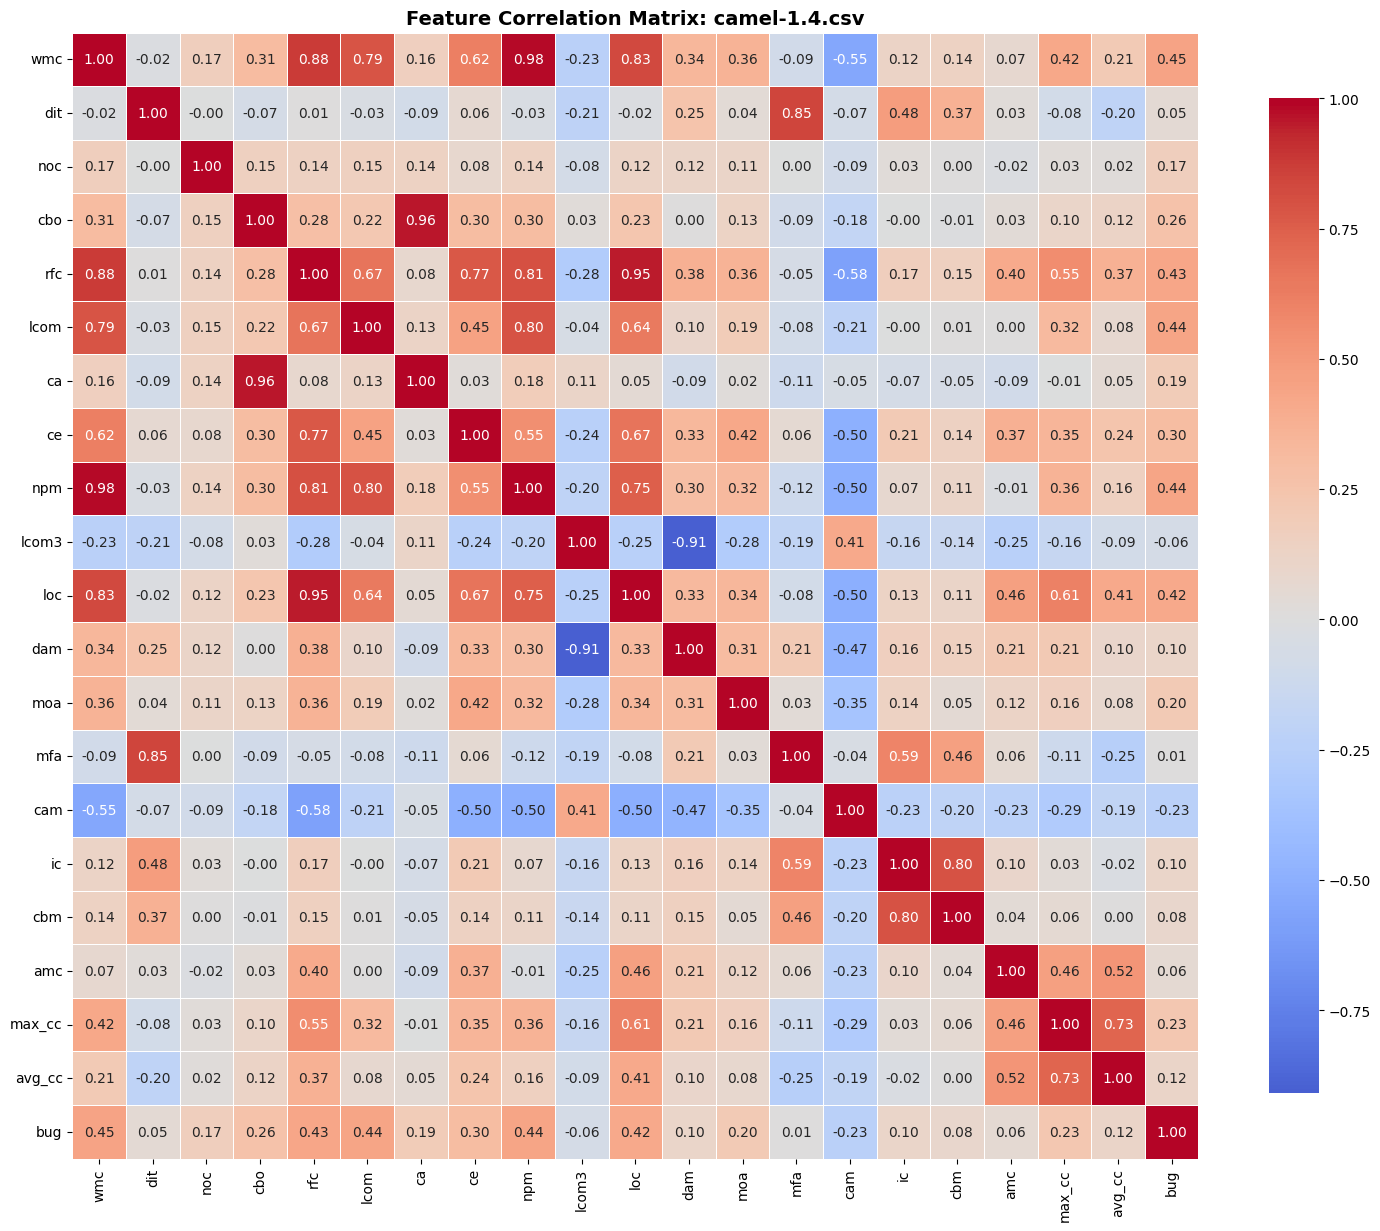

Top 3 features correlated with bugs: wmc(0.448), npm(0.436), lcom(0.436)
--------------------------------------------------------------------------------

Generating correlation matrix for: camel-1.6.csv
Saved: output/images/correlations/camel-1.6_correlation.png
Saved: output/images/correlations/camel-1.6_correlation.png


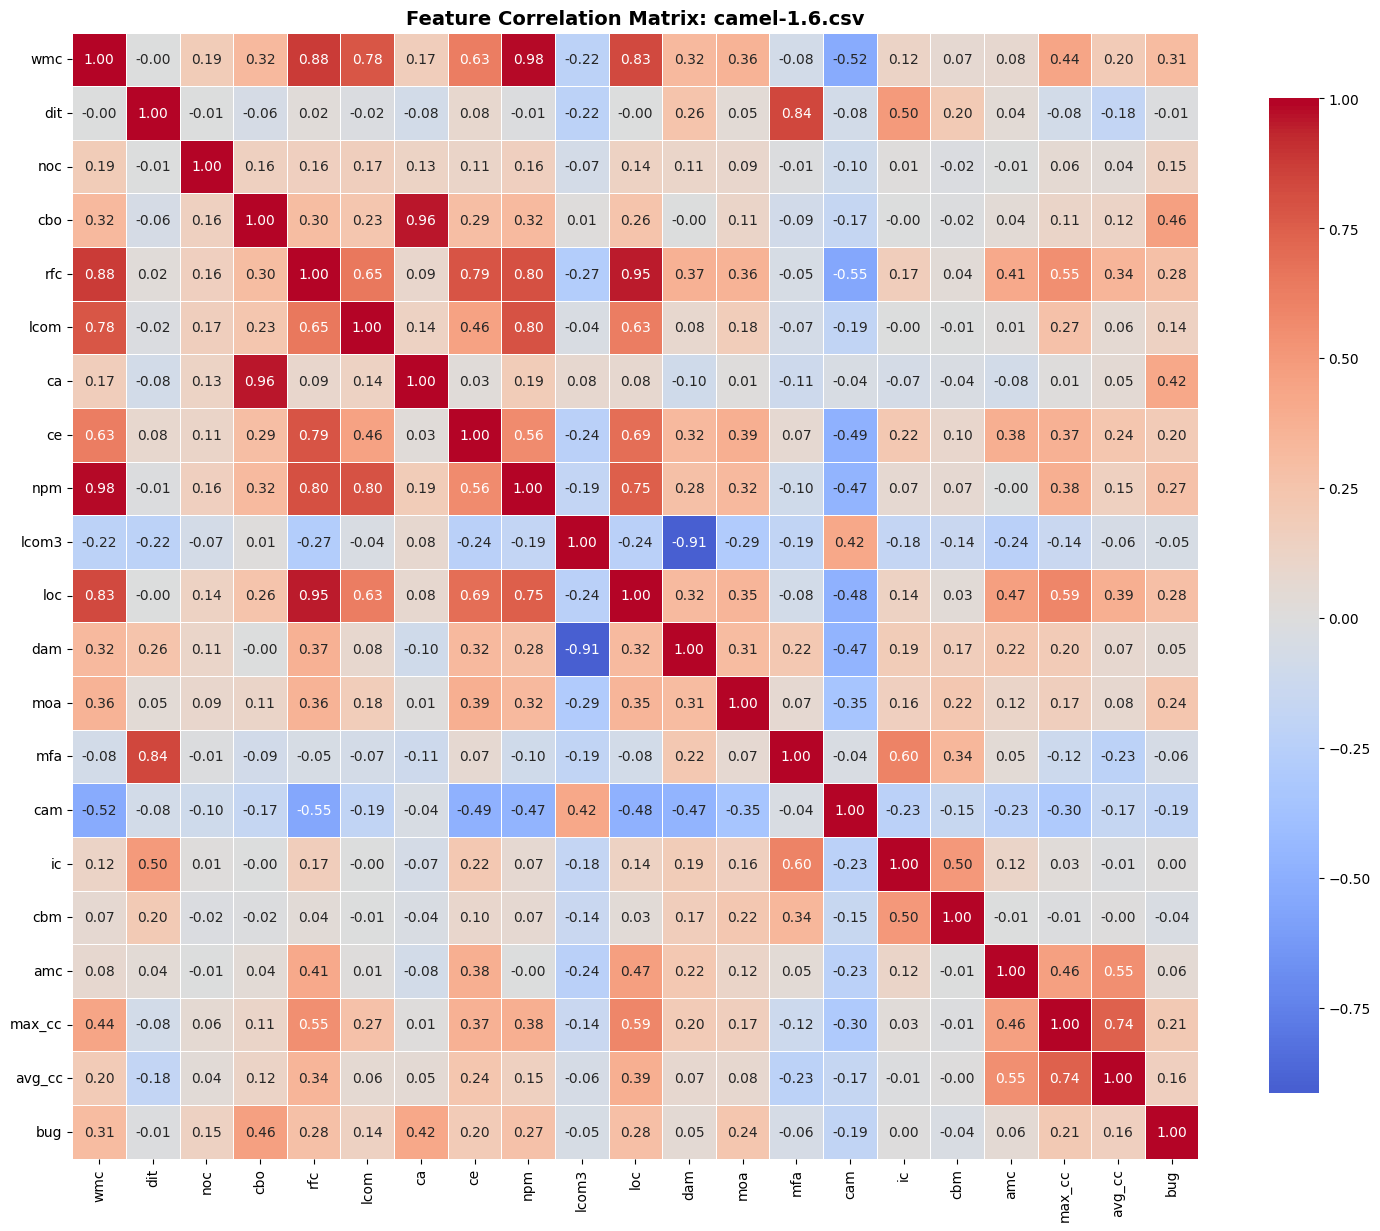

Top 3 features correlated with bugs: cbo(0.463), ca(0.424), wmc(0.305)
--------------------------------------------------------------------------------

Generating correlation matrix for: ivy-1.1.csv
Saved: output/images/correlations/ivy-1.1_correlation.png
Saved: output/images/correlations/ivy-1.1_correlation.png


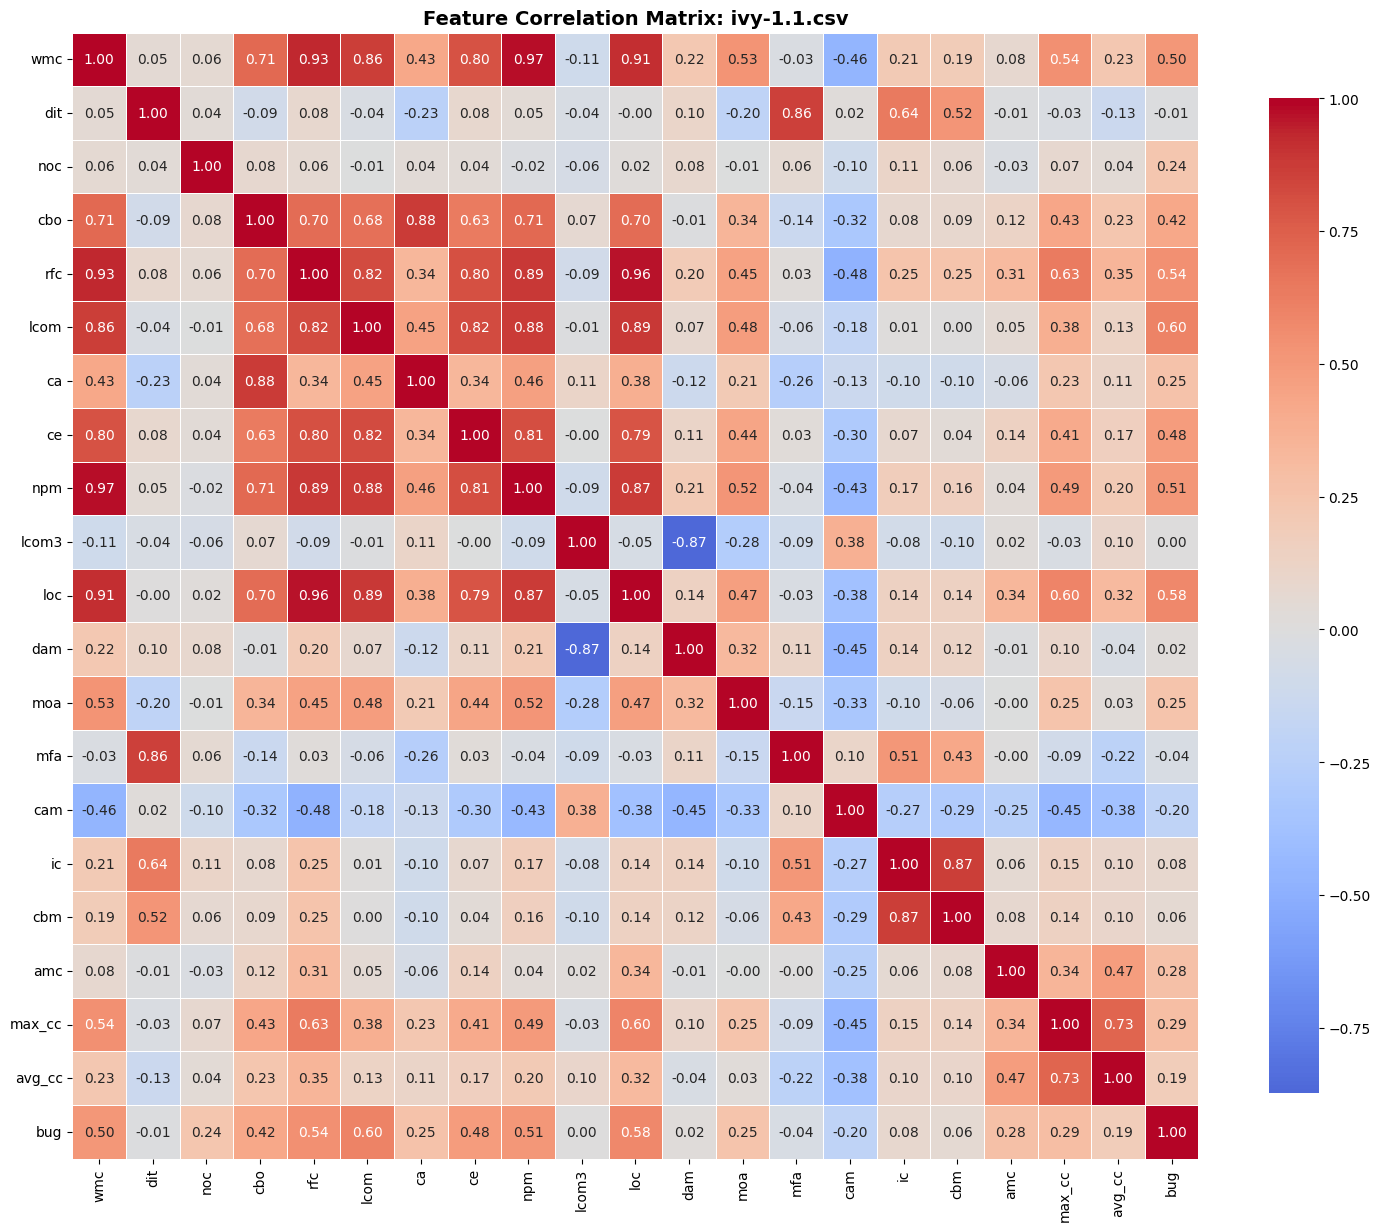

Top 3 features correlated with bugs: lcom(0.599), loc(0.579), rfc(0.539)
--------------------------------------------------------------------------------

Generating correlation matrix for: jedit-4.3.csv
Saved: output/images/correlations/jedit-4.3_correlation.png
Saved: output/images/correlations/jedit-4.3_correlation.png


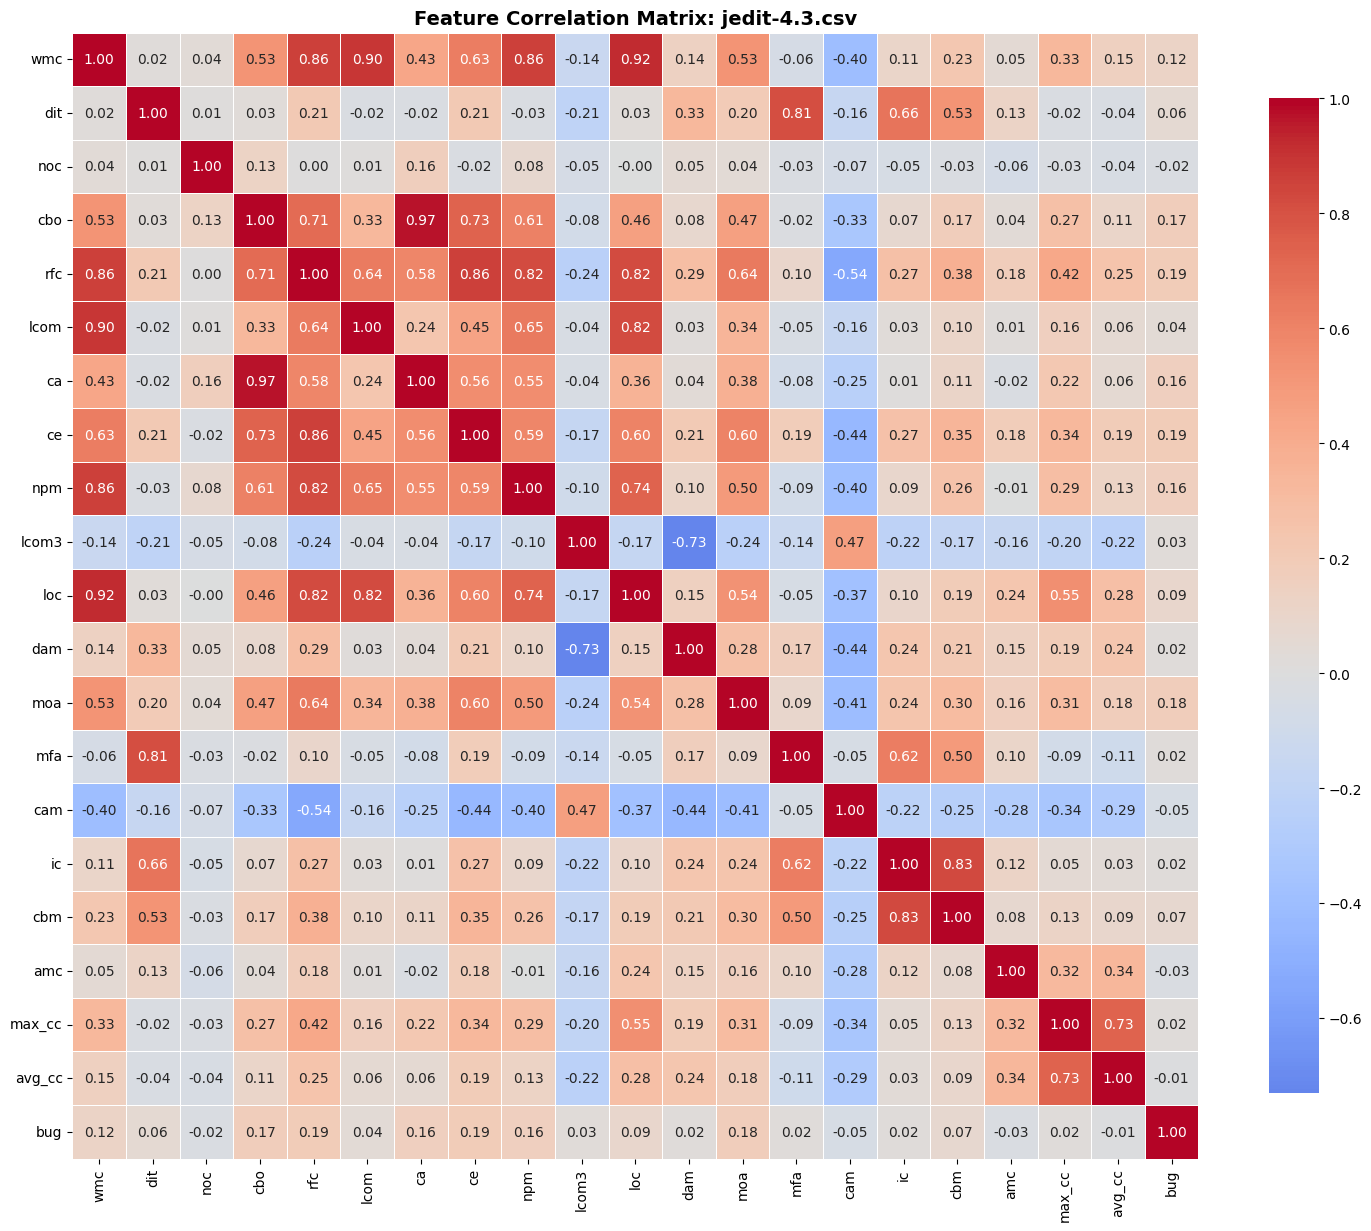

Top 3 features correlated with bugs: ce(0.194), rfc(0.190), moa(0.178)
--------------------------------------------------------------------------------

Generating correlation matrix for: log4j-1.2.csv
Saved: output/images/correlations/log4j-1.2_correlation.png
Saved: output/images/correlations/log4j-1.2_correlation.png


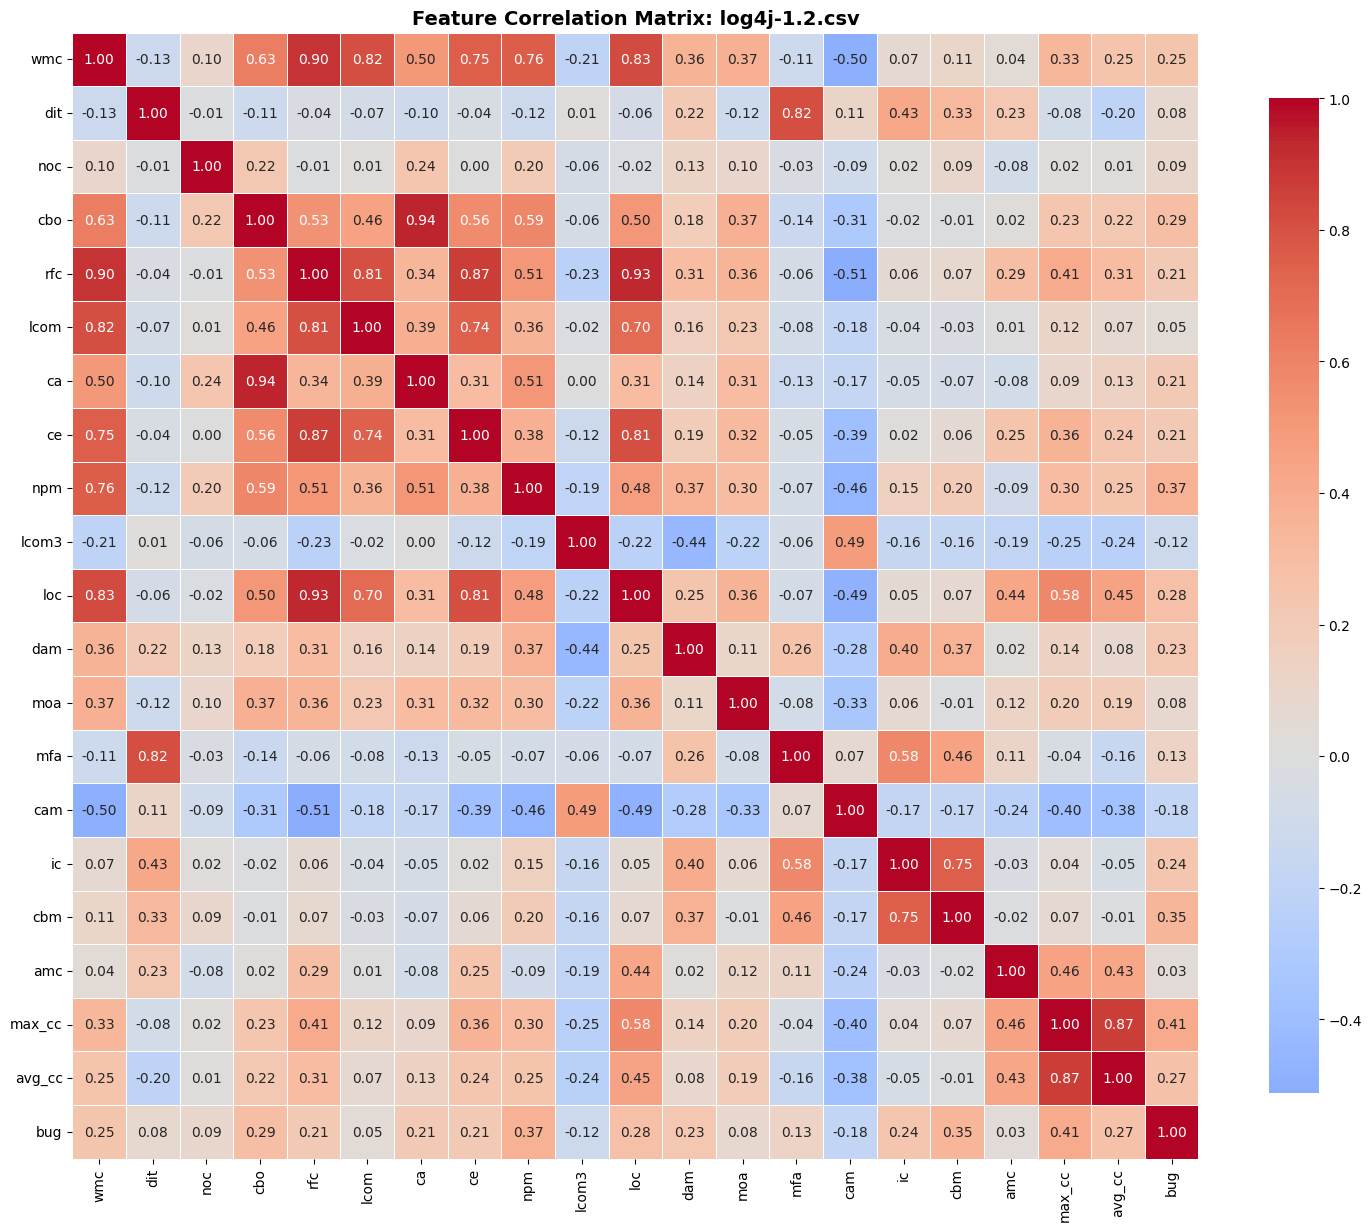

Top 3 features correlated with bugs: max_cc(0.407), npm(0.369), cbm(0.345)
--------------------------------------------------------------------------------

Generating correlation matrix for: lucene-2.4.csv
Saved: output/images/correlations/lucene-2.4_correlation.png
Saved: output/images/correlations/lucene-2.4_correlation.png


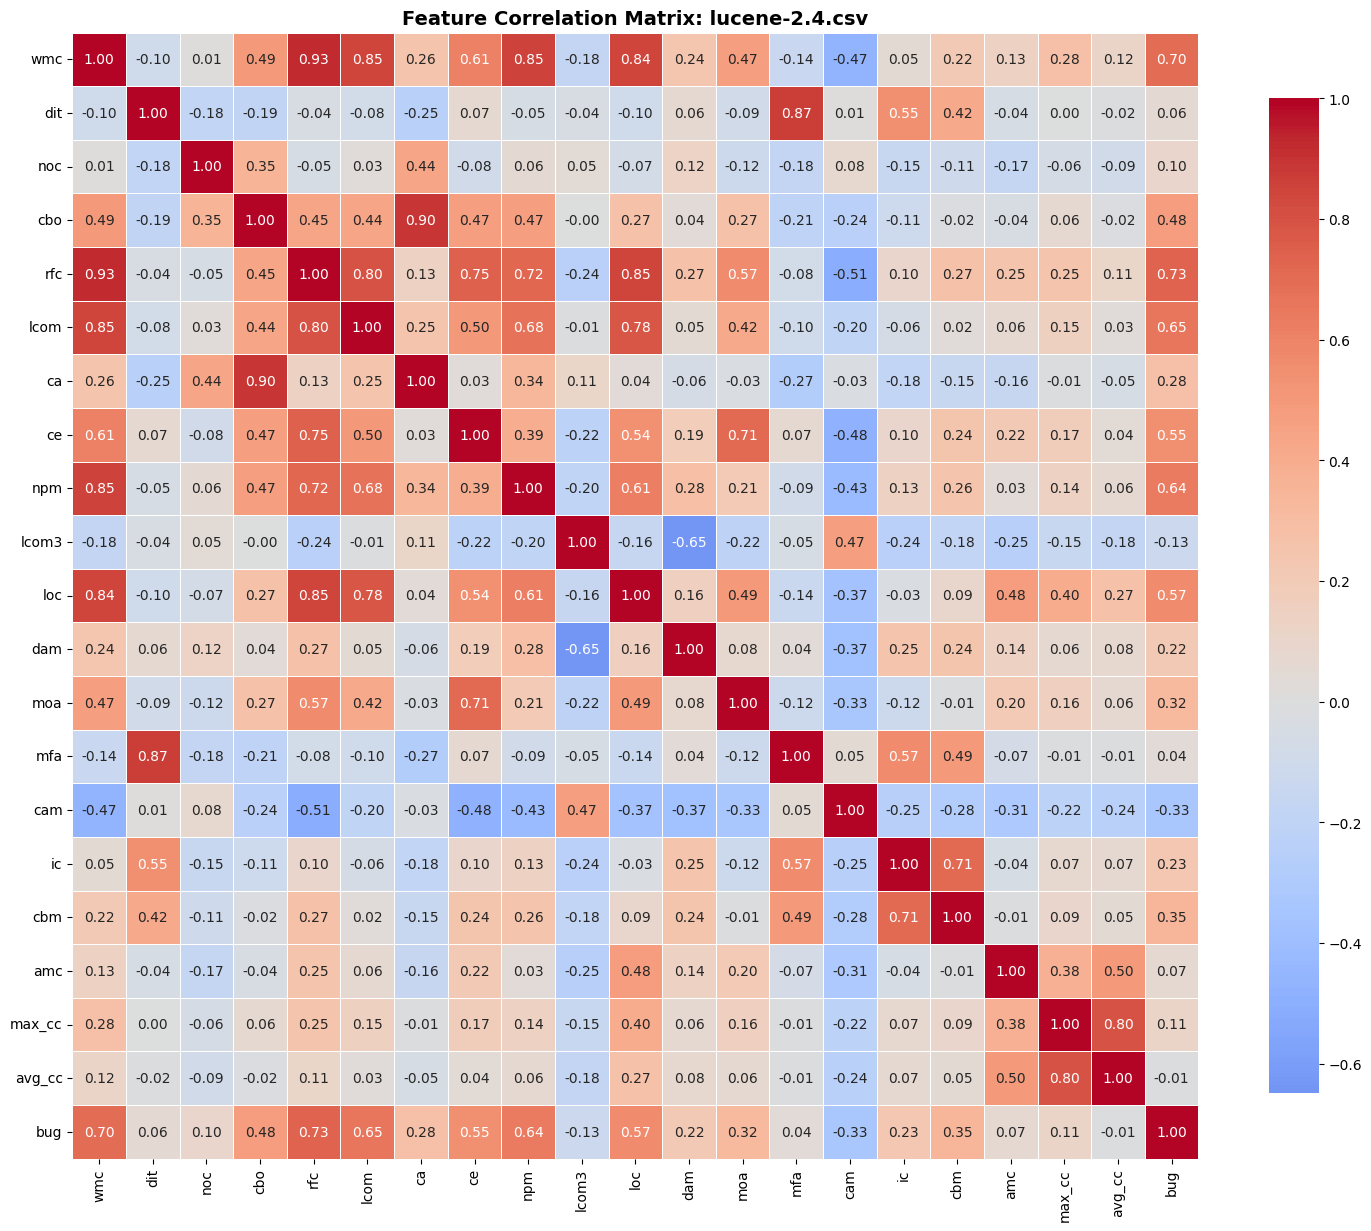

Top 3 features correlated with bugs: rfc(0.734), wmc(0.700), lcom(0.654)
--------------------------------------------------------------------------------

Generating correlation matrix for: poi-3.0.csv
Saved: output/images/correlations/poi-3.0_correlation.png
Saved: output/images/correlations/poi-3.0_correlation.png


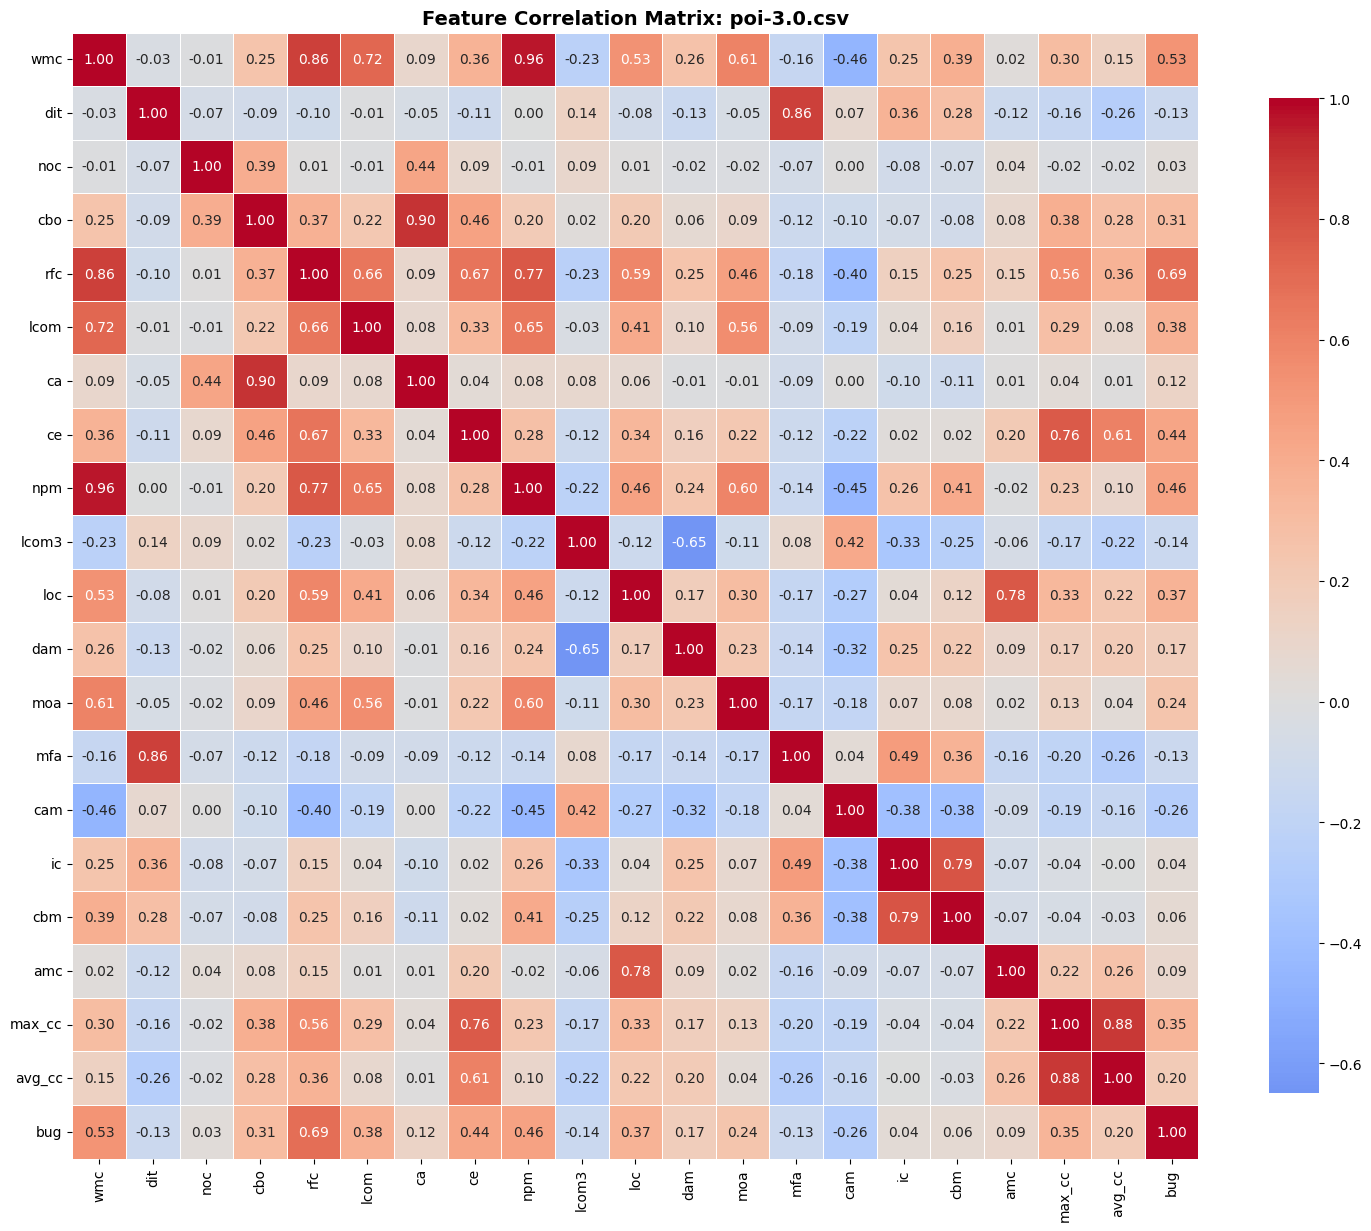

Top 3 features correlated with bugs: rfc(0.686), wmc(0.526), npm(0.455)
--------------------------------------------------------------------------------

Generating correlation matrix for: synapse-1.2.csv
Saved: output/images/correlations/synapse-1.2_correlation.png
Saved: output/images/correlations/synapse-1.2_correlation.png


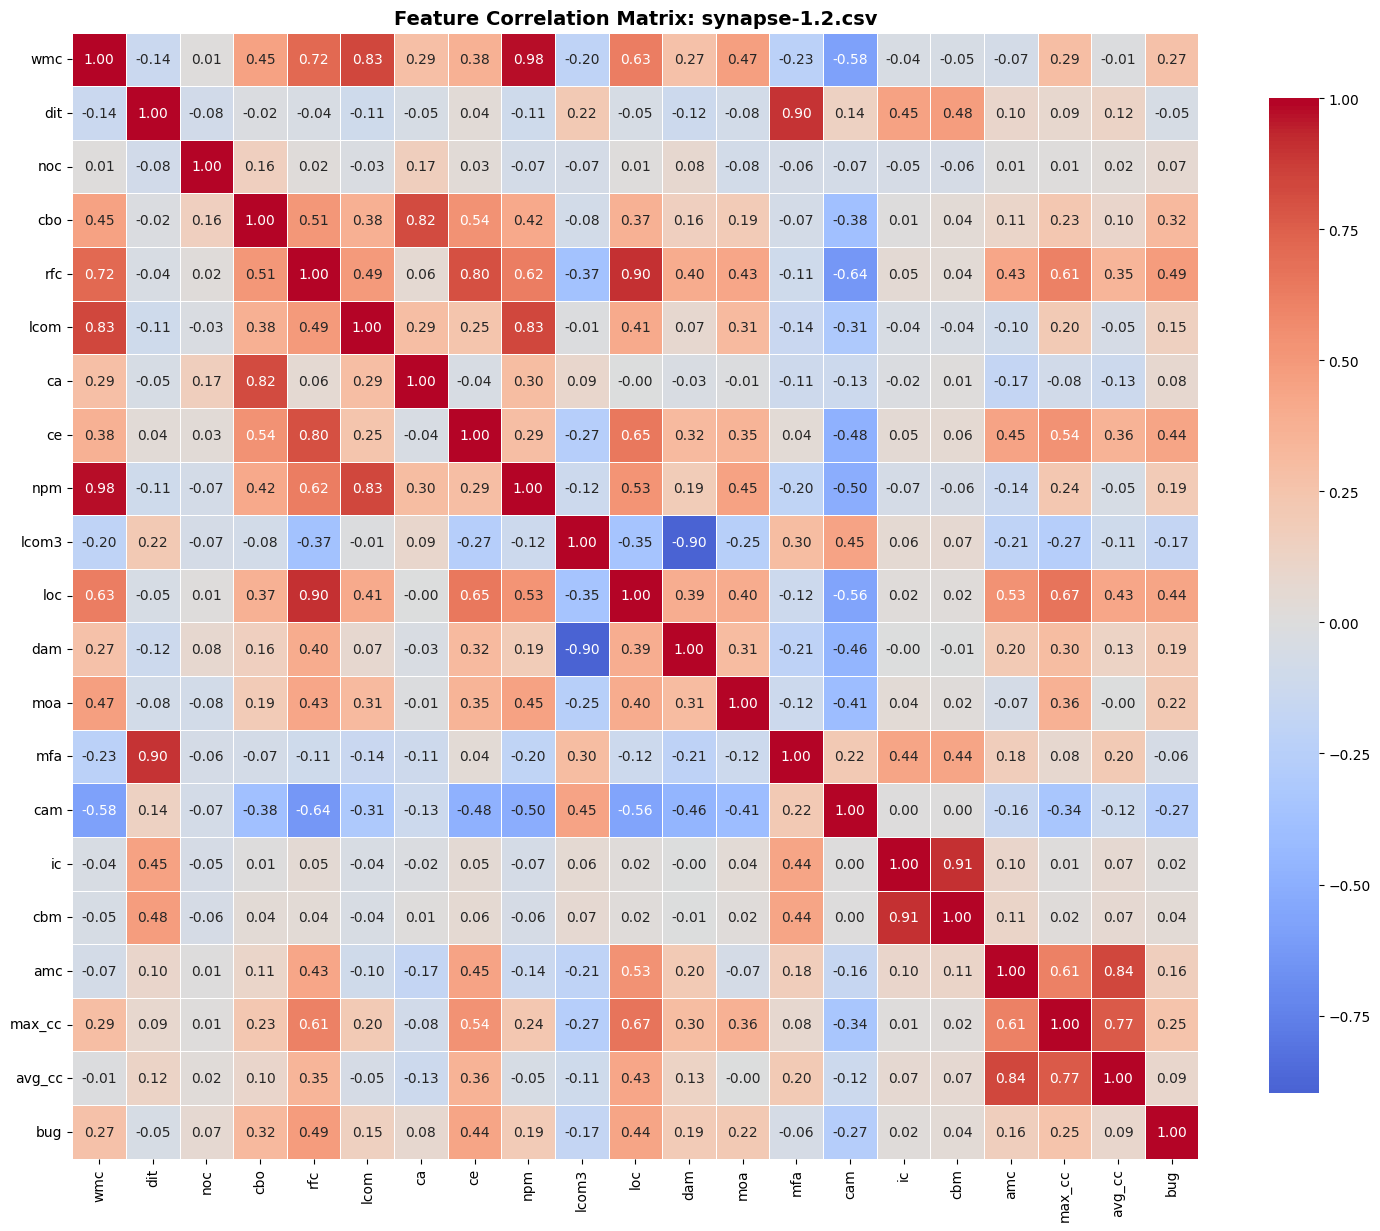

Top 3 features correlated with bugs: rfc(0.487), loc(0.444), ce(0.437)
--------------------------------------------------------------------------------

Generating correlation matrix for: velocity-1.6.csv
Saved: output/images/correlations/velocity-1.6_correlation.png
Saved: output/images/correlations/velocity-1.6_correlation.png


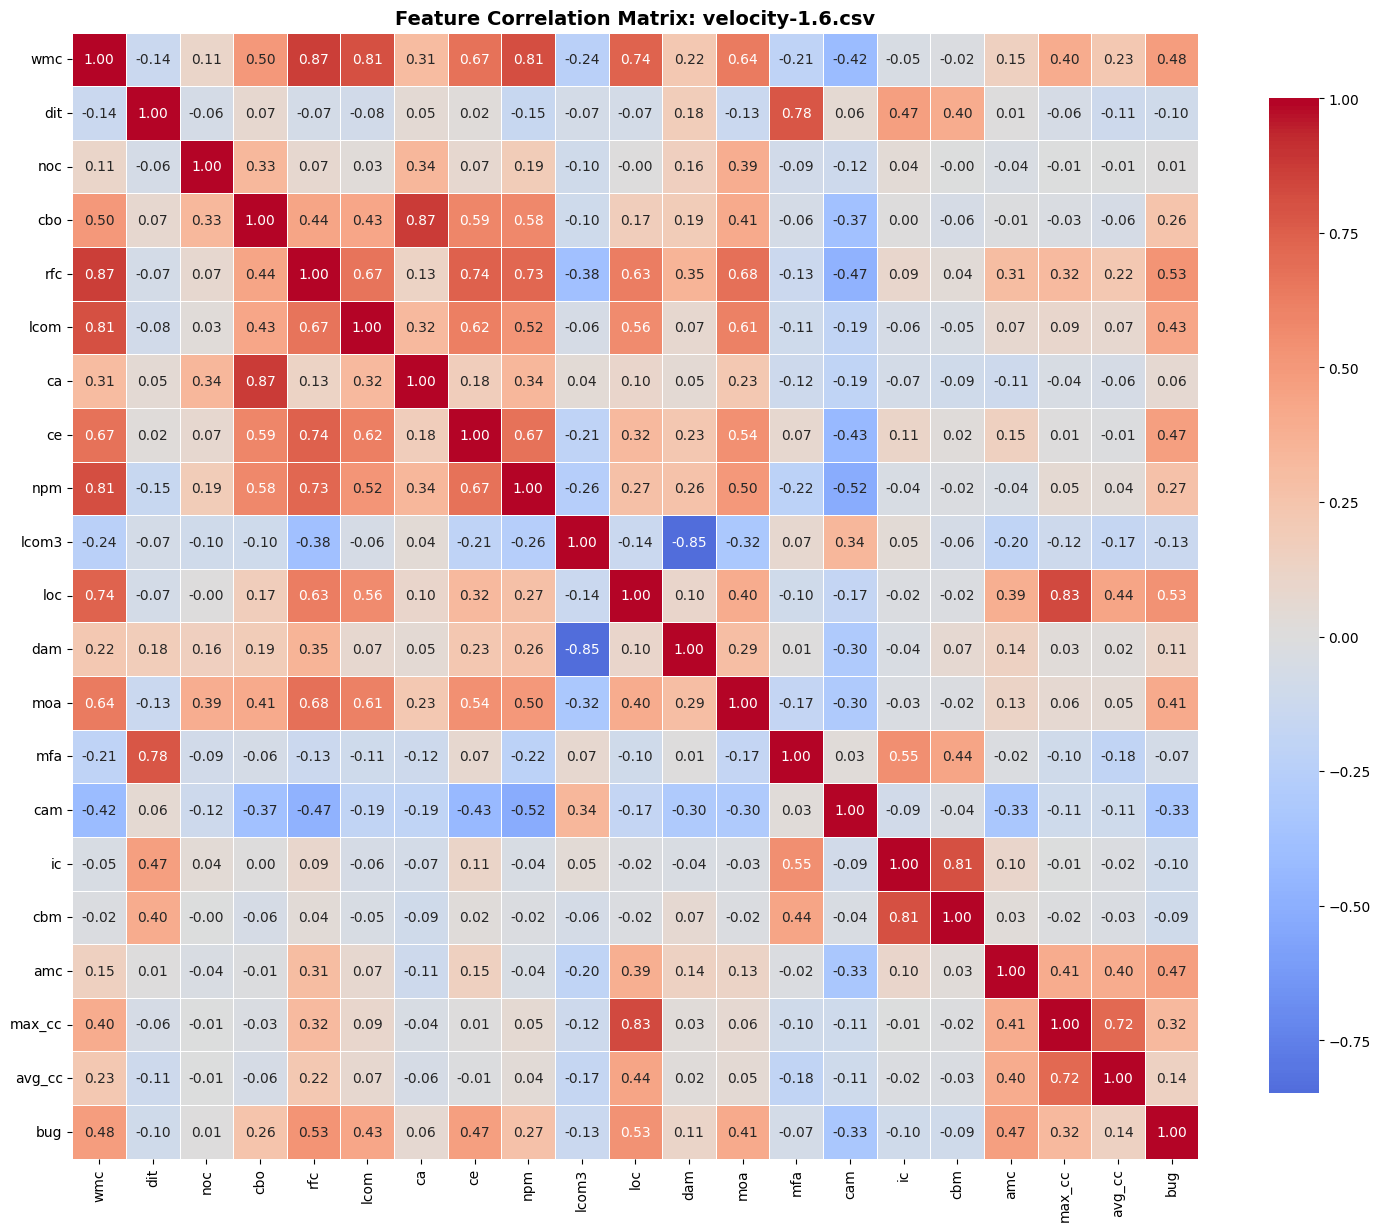

Top 3 features correlated with bugs: loc(0.532), rfc(0.525), wmc(0.479)
--------------------------------------------------------------------------------

Generating correlation matrix for: xalan-2.7.csv
Saved: output/images/correlations/xalan-2.7_correlation.png
Saved: output/images/correlations/xalan-2.7_correlation.png


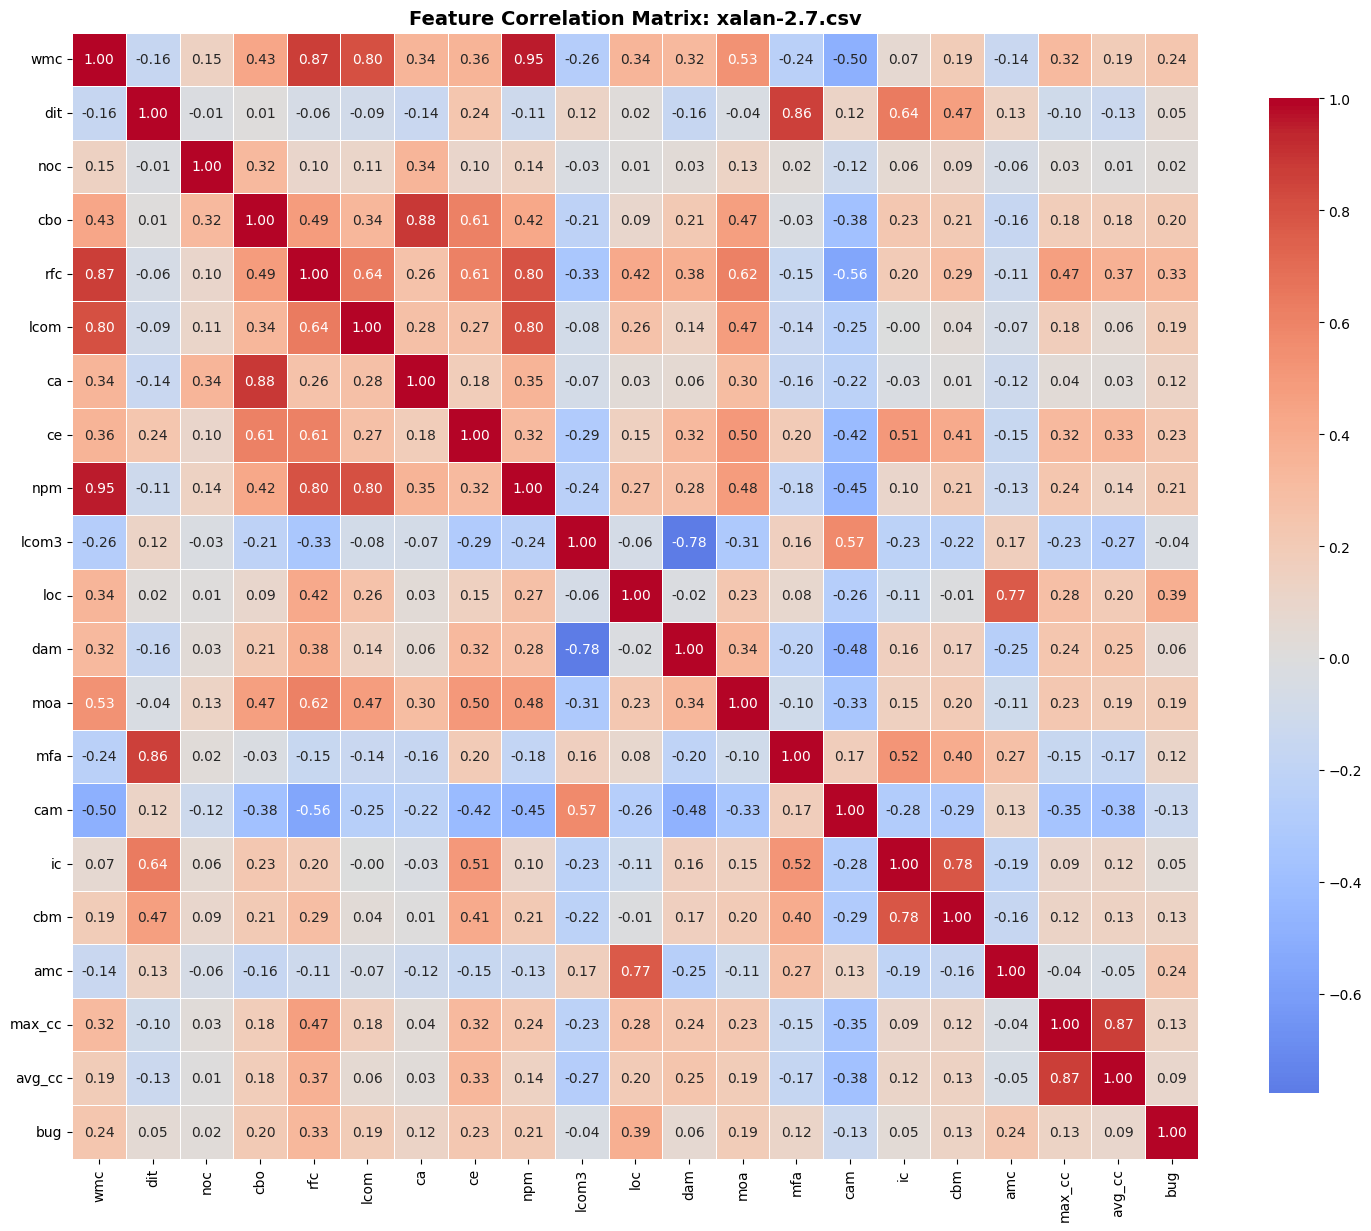

Top 3 features correlated with bugs: loc(0.389), rfc(0.329), wmc(0.243)
--------------------------------------------------------------------------------

Generating correlation matrix for: xerces-1.3.csv
Saved: output/images/correlations/xerces-1.3_correlation.png
Saved: output/images/correlations/xerces-1.3_correlation.png


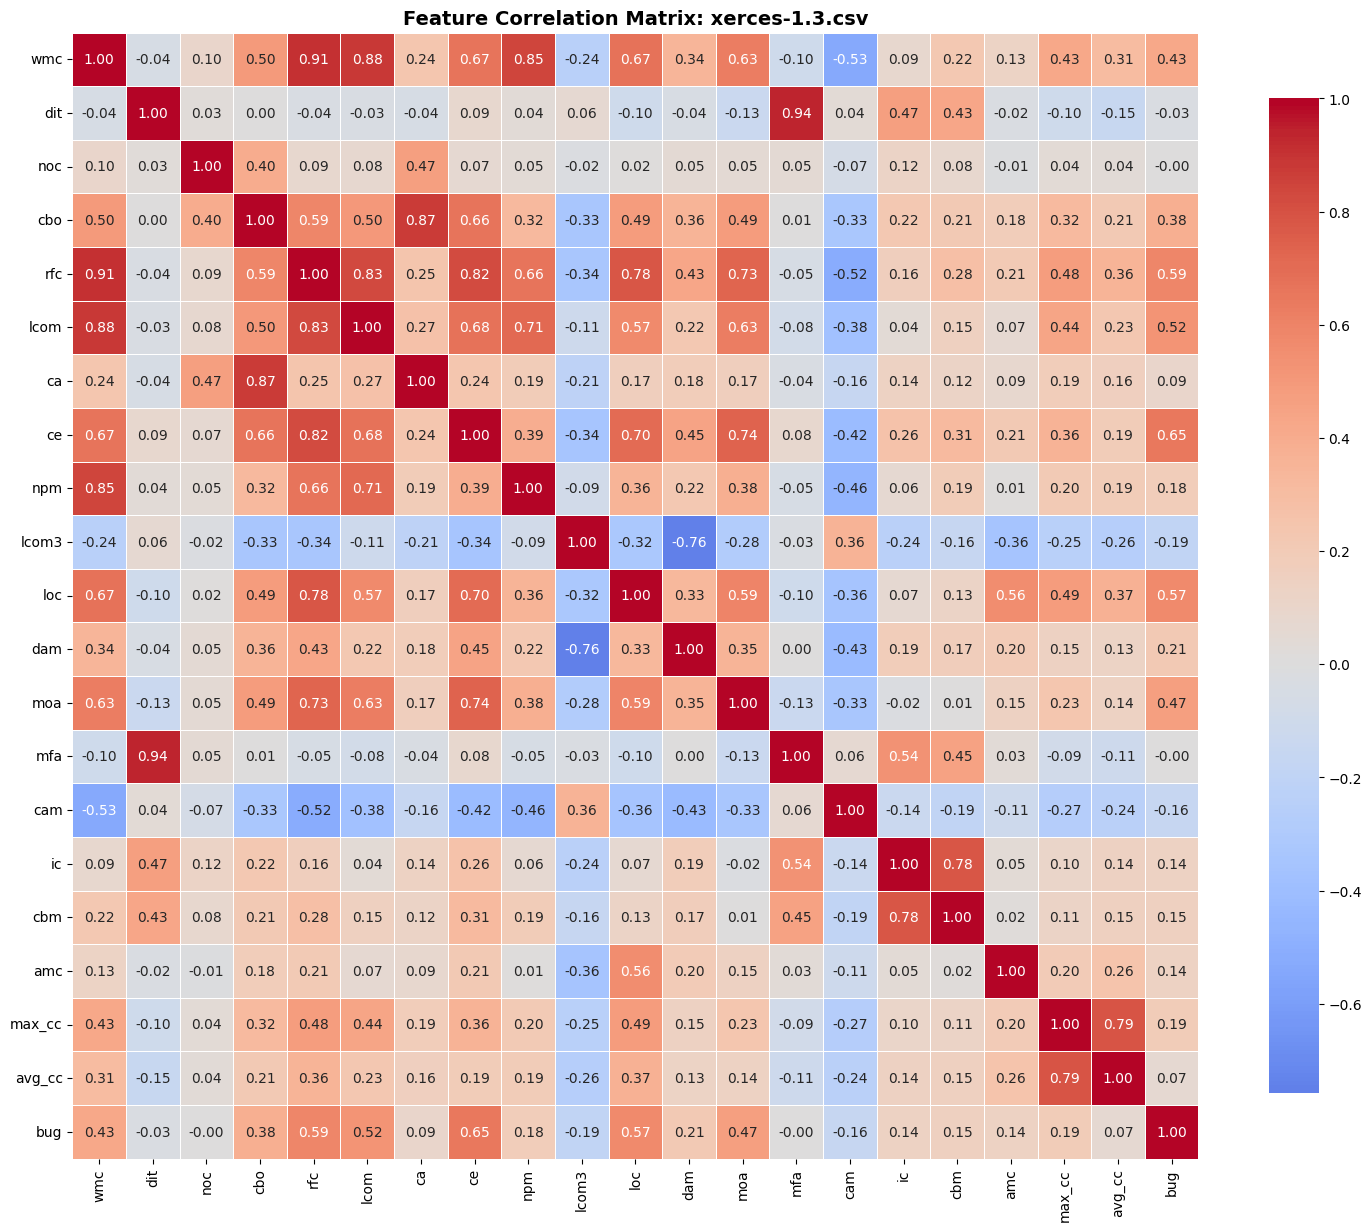

Top 3 features correlated with bugs: ce(0.651), rfc(0.591), loc(0.569)
--------------------------------------------------------------------------------


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os, pandas as pd

# Visualize correlation matrices for all datasets
data_path = 'datasets/same-project/train'
datasets = [f for f in os.listdir(data_path) if f.endswith('.csv')]


for dataset_name in sorted(datasets):
    print(f"\nGenerating correlation matrix for: {dataset_name}")
    
    # Load dataset
    file_path = os.path.join(data_path, dataset_name)
    df = pd.read_csv(file_path)
    
    # Remove non-numeric columns (keep bug)
    features = df.drop(columns=['name'])
    
    # Calculate correlation matrix
    corr_matrix = features.corr()
    
    # Create visualization
    plt.figure(figsize=(15, 13))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title(f'Feature Correlation Matrix: {dataset_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    # Save the figure BEFORE showing it
    os.makedirs('output/images/correlations', exist_ok=True)
    output_filename = f"output/images/correlations/{dataset_name.replace('.csv', '')}_correlation.png"
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {output_filename}")
    
    plt.show()
    
    # Show top correlations with bug
    bug_corr = corr_matrix['bug'].drop('bug').sort_values(ascending=False)
    print(f"Top 3 features correlated with bugs: {', '.join([f'{k}({v:.3f})' for k,v in bug_corr.head(3).items()])}")
    print("-" * 80)